In [68]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [107]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'cleaned_data.csv')
df = pd.read_csv(data_path, delimiter=',')
df = df.drop(columns='Unnamed: 0')
df.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Month,Day_in_week,Points (Total)
0,0.668,0.758,0.033,0.483,0.000,0.834,-5176.0,5,0,200
1,0.652,0.800,0.061,0.143,0.629,0.234,-4019.0,5,0,199
2,0.812,0.479,0.333,0.213,0.000,0.559,-5678.0,5,0,198
3,0.783,0.592,0.033,0.435,0.000,0.726,-8332.0,5,0,197
4,0.569,0.724,0.047,0.228,0.000,0.562,-4076.0,5,0,196


In [108]:
# Standardise the data
df_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Loudness']
for feature in df_features:
    df[feature] = (df[feature] - np.mean(df[feature]))/np.std(df[feature])
df.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Month,Day_in_week,Points (Total)
0,-0.142596,0.761957,-0.757431,1.004027,-0.154100,1.458370,0.398291,5,0,200
1,-0.258317,1.023862,-0.475266,-0.396674,10.256501,-1.206349,0.890138,5,0,199
2,0.898899,-0.977839,2.265765,-0.108294,-0.154100,0.237040,0.184888,5,0,198
3,0.689154,-0.273190,-0.757431,0.806281,-0.154100,0.978720,-0.943343,5,0,197
4,-0.858623,0.549939,-0.616349,-0.046499,-0.154100,0.250364,0.865907,5,0,196


In [109]:
# Convert categorial variables to one-hot numeric array
enc = OneHotEncoder()
enc.fit(df[['Month','Day_in_week']])
print(enc.categories_)
onehot = enc.transform(df[['Month','Day_in_week']]).toarray()
onehot = pd.DataFrame(onehot,columns=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
onehot.head()

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([0, 1, 2, 3, 4, 5, 6])]


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Add back into original df
df = pd.concat([df,onehot],axis=1)
df = df.drop(columns=['Month','Day_in_week'])
df.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Points (Total),Jan,Feb,...,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,-0.142596,0.761957,-0.757431,1.004027,-0.154100,1.458370,0.398291,200,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.258317,1.023862,-0.475266,-0.396674,10.256501,-1.206349,0.890138,199,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.898899,-0.977839,2.265765,-0.108294,-0.154100,0.237040,0.184888,198,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.689154,-0.273190,-0.757431,0.806281,-0.154100,0.978720,-0.943343,197,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.858623,0.549939,-0.616349,-0.046499,-0.154100,0.250364,0.865907,196,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
b = []
for i in range(0,201):
        b.append(i)

In [116]:
# Train the linear regression model
X = df[['Danceability','Energy','Speechiness','Acousticness','Instrumentalness','Valence','Loudness']]
y = df['Points (Total)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = pd.cut(y_pred,bins=b,labels=range(1,201))
reg.score(X_test, y_test)

0.004772626262159796

<Axes: >

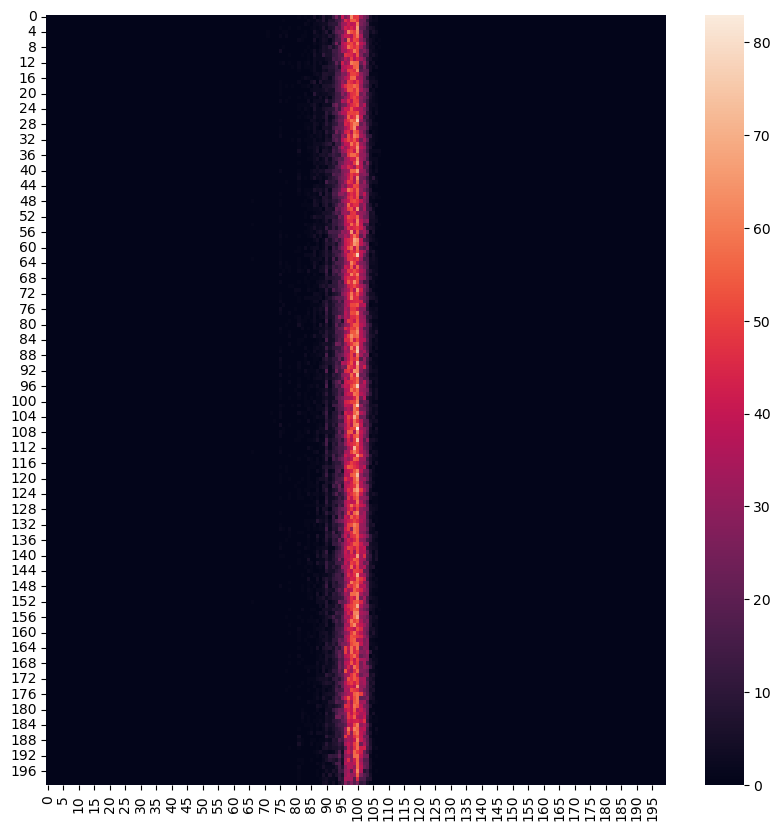

In [113]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_cm)